# SOLAR II - Exploring the solar surface

Since our Sun is our nearest star we can observe its surface in great detail. In February 2010, NASA launched the __[Solar Dynamics Observatory (SDO)](https://sdo.gsfc.nasa.gov/)__ as part of their Living With a Star Program, designed to understand the causes of solar variability and its impacts on Earth. To achieve this, SDO has three instruments on board:
- Atmospheric Imaging Assembly (AIA)
- Helioseismic and Magnetic Imager (HMI)
- EUV Variability Experiment (EVE)

<div class="alert alert-block alert-info">
    
**GOAL :** In this session we are going to be using data from two of SDO's instruments, AIA and HMI, to explore how the surface of the Sun changes overtime. 

**AIM :** To understand how to access, manipulate and plot images of the solar surface. 

**OUTPUT :** Create maps and animations of regions of the solar surface which display different types of phenomena.
</div>

## Atmospheric Imaging Assembly (AIA) 

The Atmospheric Imaging Assembly (AIA) images the solar atmosphere in multiple wavelengths to link changes in the surface to interior changes. Each of these wavelengths probes a different temperature, which corresponds to a specific layer of the solar atmosphere. These wavelengths are as follows:

- **1700Å:** photosphere, 4,500 Kelvin
- **4500Å:** photosphere, 6,000 Kelvin
- **1600Å:** upper photosphere and transition region, 10,000 Kelvin
- **304Å:** transition region and chromosphere, 50,000 Kelvin
- **171Å:** upper transition region and quiet corona, 600,000 Kelvin
- **193Å:** Corona and hot flare plasma, 1 million Kelvin
- **211Å:** active regions, 2 million Kelvin
- **335Å:** active regions, 2.5 million Kelvin
- **94Å:** flaring regions, 6 million Kelvin
- **131Å:** flaring regions, 10 million Kelvin

For more details on the specific ions each wavelength corresponds to and key features to look out for, see __[The Sun Today blog](https://www.thesuntoday.org/sun/wavelengths/)__.
Each of these wavelengths has a specific colour associated with it when plotting to make identification easier, see the image below. 

![title](aia_wavelengths.png)

**A couple of things to note:**
- An image of the Sun from AIA is taken in all 10 wavelengths every 10 seconds!
- Å represents the unit of Angstrom which is equivalent to 10<sup>-10</sup> m

## Helioseismic and Magnetic Imager (HMI)

The Helioseismic and Magnetic Imager (HMI) is an instrument designed to study oscillations and the magnetic field at the solar surface, or photosphere. HMI observes the full solar disk at 6173 Å with a resolution of 1 arcsecond and HMI Observables are taken every 45 seconds. There are three main types of data products for HMI.

<ins>Line-of-Sight Magnetograms</ins>

Magnetograms are maps of the observed solar magnetic field in the photosphere. The line-of-sight component of the field can be accurately measured as it evolves in time over the full visible disk of the Sun. The HMI instrument exploits the Zeeman effect (splitting of a spectral line into several components in the presence of a magnetic field), which allows the strength of the line-of-sight component of the magnetic field to be determined by measurements of the spectral line in circularly polarised light.

Use `a.Physobs.los_magnetic_field` when searching for data.

<ins>Continuum Intensitygrams</ins>

The HMI continuum data is a map of the continuum intensity of the solar spectrum which creates broad-wavelength photographs of the solar photosphere (i.e. solar surface). 

Use `a.Physobs.intensity` when searching for data.

<ins>Dopplergrams</ins>

HMI creates maps of the solar surface velocity. Blue areas represent plasma which is moving towards the observer (blue-shifted) and red areas represent plasma which is moving away from the observer (red-shifted). 

Use `a.Physobs.los_velocity` when searching for data.

**An example of each of the data products is shown in the image below.**

![title](hmi_data.png)

***

### Accessing SDO Data

In this session we will be focusing on using the __[SunPy](https://sunpy.org/)__ package where documentation and examples can be found on their website. 

Let's import the key Python packages that we will need.

In [1]:
# some basic packages
import os
import sys
import fnmatch
import numpy as np

# solar physics package
import sunpy

# importing plotting packages
import matplotlib.pyplot as plt
from matplotlib import dates

# setting text size for plots
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12

# importing widgets for interactive plots
from ipywidgets import *

In [2]:
# Adding a file search function in case it is needed
def file_search(file_string, location):
    '''
    Searches the directory for all files with the file_string
    '''
    file_names = []
    for root, dirnames, filenames in os.walk(location):
        for filename in fnmatch.filter(filenames, file_string):
            file_names.append(os.path.join(root, filename))
    return sorted(file_names)

Data from SDO's AIA and HMI can be accessed from the Virtual Solar Observatory (VSO) through the Python sunpy package using the Fido interface which searchs for and downloads solar data. 

In [3]:
from sunpy.net import Fido
from sunpy.net import attrs as a
import astropy.units as u

To search for data with Fido, you need to specify attributes to search with. Examples of these are shown below:
    
- use a.Time to specify the data and time in the format 'yyyy/mm/dd hh:mm:ss' 
    > e.g. `a.Time('2025/10/01 00:00:15', '2025/10/01 00:00:30')`
    
- use a.Sample to get a series of data at a specific time interval during the range from a.Time
    > e.g. `a.Sample(1*u.h)`

- use the a.Instrument to specify which instrument you would like (i.e. AIA, HMI)
    > e.g. `a.Instrument.aia`
    
- search for specific physical observables using a.Physobs (see list above in HMI information)
    > e.g. `a.Physobs.los_magnetic_field`
    
- use a.wavelength to specify different 
    > e.g. `a.Wavelength(171*u.angstrom)`

<div class="alert alert-block alert-danger">
<b>WARNING:</b> During this session, we will be downloading data from the VSO using Fido within Python. This involves requesting data from the server and downloading it locally to your machine. With this in mind, please be patient when making search requests and downloading data. If you have any errors, please try again. If you continually have issues, then let a demonstrator know who will give you access to the data. 
</div>

### Example:

Putting this all together, search for AIA images on Christmas Day 2024 at 9 am with a wavelength of 131 angstroms.

In [4]:
result = Fido.search(a.Time('2024/12/25 09:00:00', '2024/12/25 09:00:15'),
                     a.Instrument('aia'),
                     a.Wavelength(131*u.angstrom))

In [5]:
print(result)

Results from 1 Provider:

1 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport
Total estimated size: 67.789 Mbyte

       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size  
                                                                     Angstrom                                                                        Mibyte 
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- --------
2024-12-25 09:00:06.000 2024-12-25 09:00:07.000    SDO        AIA 131.0 .. 131.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844




Once you have the data you are looking for you can download it using fetch, giving the path where you would like the files to download. I suggest you make a folder somewhere on you computer to store all files from this session, for example, I have saved them in folder ThaiPASS/solar_data/{file} where {file} represents the filenames.

In [6]:
downloaded_files = Fido.fetch(result, path='/Users/u1973287/OneDrive - University of Warwick/Outreach/ThaiPASS/data/II_data{file}')

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

II_dataaia.lev1.131A_2024_12_25T09_00_06.62Z.image_lev1.fits:   0%|          | 0.00/8.71M [00:00<?, ?B/s]

In [7]:
downloaded_files # print name and location of downloaded files

['/Users/u1973287/OneDrive - University of Warwick/Outreach/ThaiPASS/data/II_dataaia.lev1.131A_2024_12_25T09_00_06.62Z.image_lev1.fits']

***

## Task II-1

- Access SDO AIA data at 171 angstroms close to 9am UT from day 245 in the year 2015 and plot the resulting table.
- Download the data to a folder on your laptop called ThaiPASS/solar.

(**Tip:** to get the date in format YYYY-MM-DD, look up a Julian calendar)

***

### Sunpy Maps

Map objects hold the two-dimensional data which makes up the image along with the accompanying metadata such as the date, coordinates, wavelength etc. The primary advantage of using a Map object over a bare NumPy array is the ability to perform coordinate aware operations on the image, such as rotating the Map to remove the roll angle of an instrument or cropping a Map to a specific field of view. 

To create a __[Map](https://docs.sunpy.org/en/stable/tutorial/maps.html)__ from an Atmospheric Imaging Assembly (AIA) image we use the map package within sunpy which automatically detects the type of file as well as the the instrument associated with it.

In [6]:
import sunpy.map

aiamap = sunpy.map.Map('data/II_data/aia_lev1_131a_2024_12_25t09_00_06_62z_image_lev1.fits')

We can inspect the Map object as a quicklook in Jupyter notebook to make sure this has worked correctly.

<sunpy.map.sources.sdo.AIAMap object at 0x1370b7e00>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 1
Detector:		 AIA
Measurement:		 131.0 Angstrom
Wavelength:		 131.0 Angstrom
Observation Date:	 2024-12-25 09:00:06
Exposure Time:		 2.901281 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600698 0.600698] arcsec / pix
Reference Pixel:	 [2041.300049 2038.27002 ] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[ 1.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0., -1., ...,  1.,  0., -1.],
       [ 0.,  0.,  2., ..., -1.,  1.,  1.],
       ...,
       [-1.,  1., -1., ...,  0.,  0.,  2.],
       [-2.,  1.,  0., ...,  1.,  0.,  1.],
       [-1.,  0., -1., ...,  1.,  1.,  0.]],
      shape=(4096, 4096), dtype=float32)
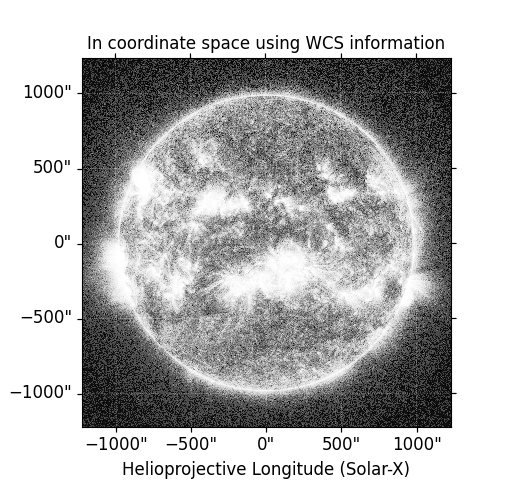
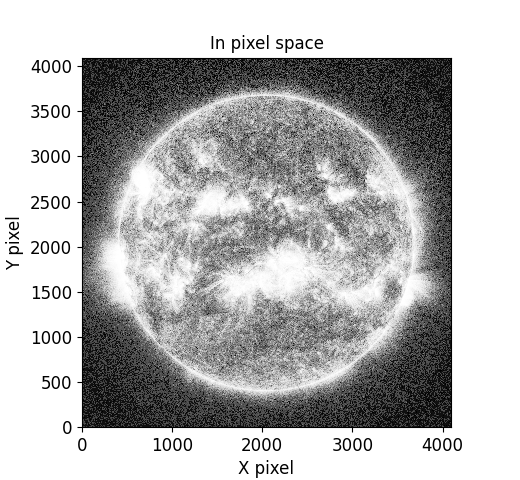
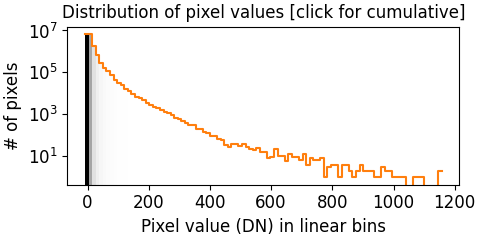
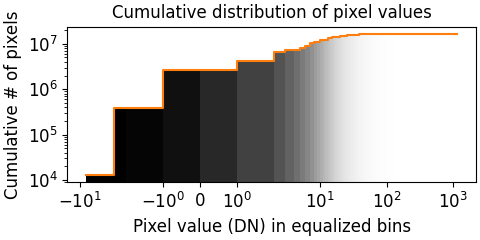

In [12]:
aiamap

We can then plot the image using the below. On top of the image we have plotted the limb of the Sun and a gid following the Heliographic Stonyhurst coordinate system. 

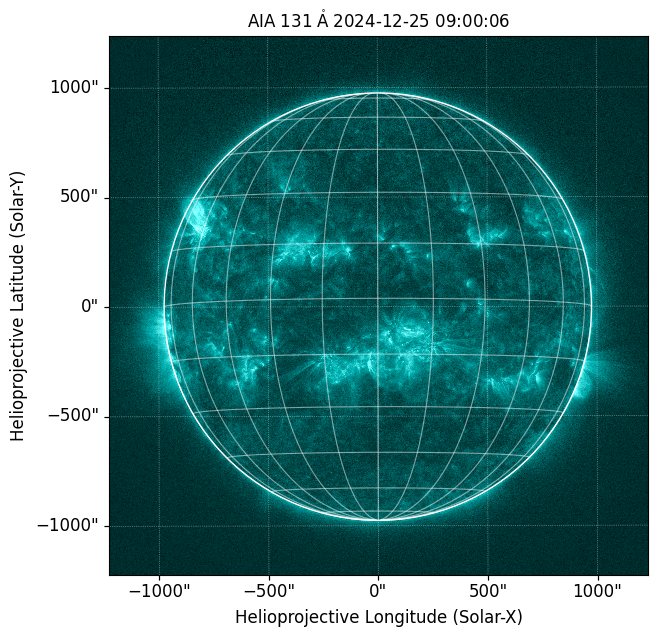

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax)
aiamap.draw_limb(axes=ax)
aiamap.draw_grid(axes=ax)
plt.show()

Sometimes an AIA image may appear "dark" when plotted as the color scale is accounting for the small set of pixels that are extremely bright. If this is the case, we can use the keyword clip_interval to clip out pixels with extreme values. Below, we clip out the darkest 1% of pixels and the brightest 0.01% of pixels.

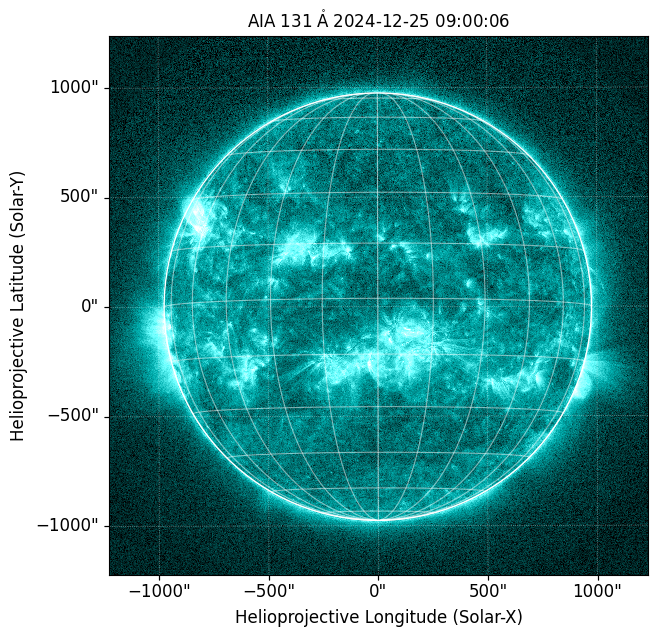

In [14]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
aiamap.draw_limb(axes=ax)
aiamap.draw_grid(axes=ax)
plt.show()

You can also save Maps as PDF files using the following:

In [16]:
fig.savefig('data/II_data/aia_map.pdf')

## Task II-2

- Using the data downloaded from Task II -1, create a sunpy Map and plot the AIA image. 

<div class="alert alert-block alert-warning">
<b>CHECKPOINT 1:</b> Find a demonstrator and show them your Map before progressing to the next task.
</div>

### Cropping a Map

To crop a Map you have to create a submap, specifying the top right corner and bottom left corner as SkyCoord objects of the area you want to crop. You can use the full map to get an idea on the rough location of these and then use trial and error to refine the area. 

For example, the code below isolates the active region on the East limb of the Sun:

In [20]:
from astropy.coordinates import SkyCoord

# defining the top_right and bottom_left corners
top_right = SkyCoord(-750 * u.arcsec, 500 * u.arcsec, frame=aiamap.coordinate_frame)
bottom_left = SkyCoord(-900 * u.arcsec, 300 * u.arcsec, frame=aiamap.coordinate_frame)

# creating the submap
aia_submap = aiamap.submap(bottom_left, top_right=top_right)

This can then be plotted in the same way as all the other Maps.

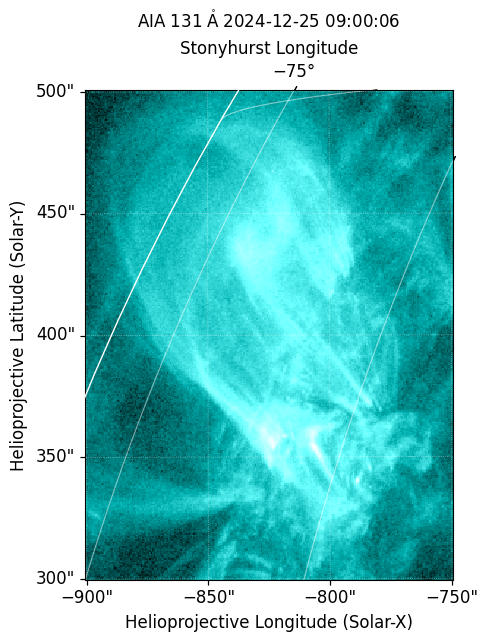

In [21]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection=aia_submap)
aia_submap.plot(axes=ax)
aia_submap.draw_limb(axes=ax)
aia_submap.draw_grid(axes=ax)

# Make some room and put the title at the top of the figure
ax.set_position([0.1, 0.1, 0.8, 0.7])
ax.set_title(ax.get_title(), pad=45)

plt.show()

## Task II-3

- Using the image created from Task II-2, crop the image to select an area which shows an active region of you choice

    (Tip: This may require trial and error so take your time!)

***

### HMI Magnetograms

In addition to the Maps from AIA, we can also get HMI Maps showing the magnetic field strength across the solar surface. Here we will search for line-of-sight magnetograms in the 45 second cadence, close to the time the AIA images were taken, to view the strength of the magnetic field across the solar surface. More details of each type of observable from HMI are given at the start of this script.

In [34]:
result = Fido.search(a.Time('2024/12/25 09:00:00', '2024/12/25 09:00:30'),
                     a.Instrument('hmi'),
                     a.Physobs.los_magnetic_field)
print(result)

Results from 1 Provider:

1 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport

       Start Time               End Time        Source Instrument    Wavelength    Provider      Physobs       Wavetype Extent Width Extent Length Extent Type   Size  
                                                                      Angstrom                                                                                  Mibyte 
----------------------- ----------------------- ------ ---------- ---------------- -------- ------------------ -------- ------------ ------------- ----------- --------
2024-12-25 09:00:22.000 2024-12-25 09:00:23.000    SDO        HMI 6173.0 .. 6174.0     JSOC LOS_magnetic_field   NARROW         4096          4096    FULLDISK -0.00098




In [35]:
downloaded_files = Fido.fetch(result, path='/Users/u1973287/OneDrive - University of Warwick/Outreach/ThaiPASS/data/II_data/{file}')
print(downloaded_files)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/Users/u1973287/OneDrive - University of Warwick/Outreach/ThaiPASS/data/II_data/hmi.m_45s.2024.12.25_09_01_30_TAI.magnetogram.fits']


In [29]:
hmimap = sunpy.map.Map('data/II_data/hmi_m_45s_2024_12_25_09_01_30_tai_magnetogram.fits')
# normalise the image between -200 and 200 to make features stand out
hmimap.plot_settings['norm'] = plt.Normalize(-200, 200)

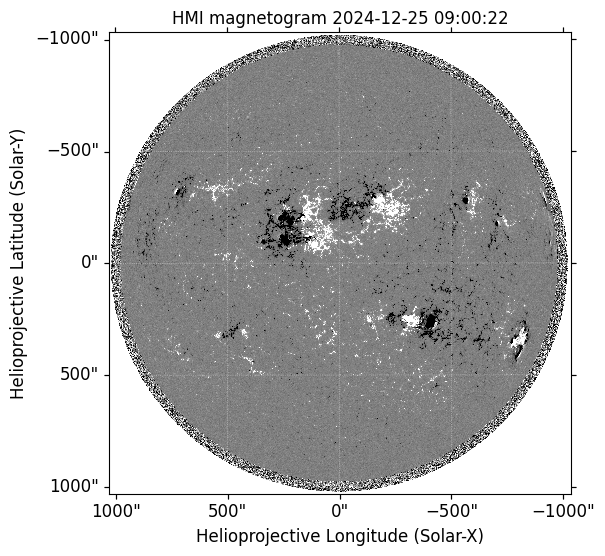

In [30]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection=hmimap)
hmimap.plot(axes=ax)
plt.show()

Let's plot both images side by side.

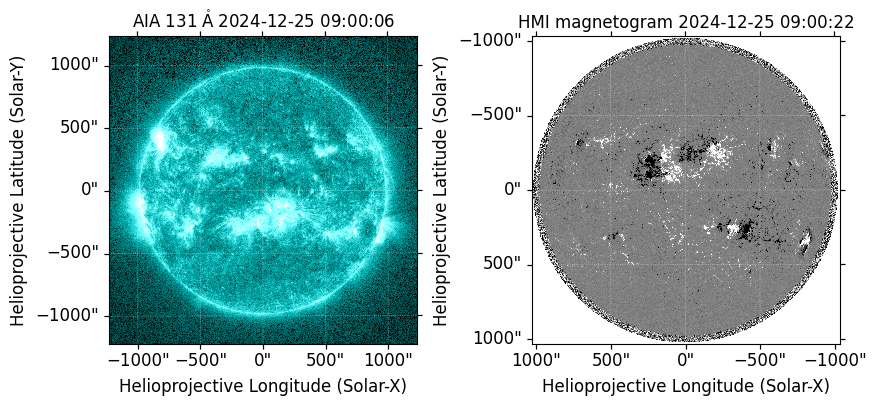

In [31]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121, projection=aiamap)
aiamap.plot(axes=ax1, clip_interval=(1, 99.9)*u.percent)
ax2 = fig.add_subplot(122, projection=hmimap)
hmimap.plot(axes=ax2)
plt.show()

Note that the HMI image is oriented “upside down” relative to the AIA image. To correct for this we can set autoalign=True and give the HMI image the projection of the AIA image, allowing to plot the HMI image onto axes defined by the AIA reference frame.

2025-09-29 11:14:20 - sunpy - INFO: Using mesh-based autoalignment


INFO: Using mesh-based autoalignment [sunpy.map.mapbase]


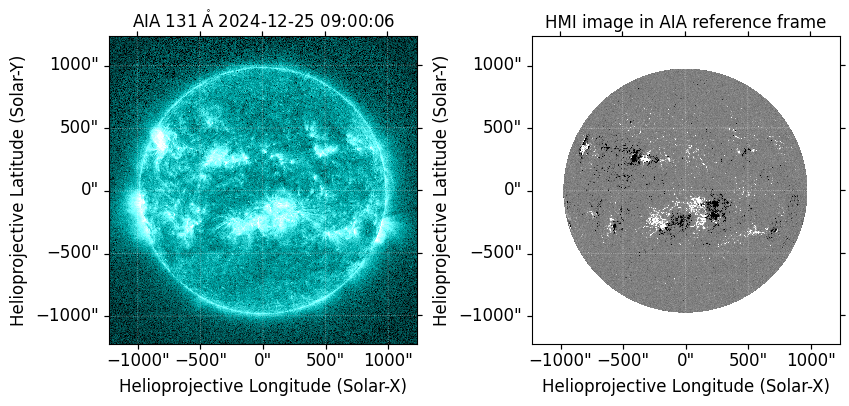

In [32]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121, projection=aiamap)
aiamap.plot(axes=ax1, clip_interval=(1, 99.9)*u.percent)
ax2 = fig.add_subplot(122, projection=aiamap)
hmimap.plot(axes=ax2, autoalign=True, title='HMI image in AIA reference frame')
ax2.axis(ax1.axis())
plt.show()

## Task II-4

- Download the matching HMI line-of-sight magnetogram for the same date as Task II-1
- Create a second Map object using the HMI magnetogram and plot the HMI image
- Correct the HMI Map to use the AIA reference frame and plot the AIA and HMI Maps side by side.

## **Additional Questions** 

Using the plot you have just created above:
- What do you see in both images?
- What information does each image give you about the solar surface?

<div class="alert alert-block alert-warning">
<b>CHECKPOINT 2:</b> Find a demonstrator and show them your AIA/HMI comparison, discussing your findings before progressing to the next task.
</div>

### HMI Dopplergrams and Intensitygrams

In addition to magnetograms, HMI data products also include dopplergrams () and intensitygrams (). We can download these as well and plot them to see surface features on the solar surface. 

In [16]:
# downlaod dopplergram 
result_dop = Fido.search(a.Time('2024/12/25 09:00:00', '2024/12/25 09:00:30'),
                     a.Instrument('hmi'),
                     a.Physobs.los_velocity)
print(result_dop)
downloaded_dop = Fido.fetch(result_dop, path='/Users/u1973287/OneDrive - University of Warwick/Outreach/ThaiPASS/data/II_data/{file}')

# download intensitygram
result_int = Fido.search(a.Time('2024/12/25 09:00:00', '2024/12/25 09:00:30'),
                     a.Instrument('hmi'),
                     a.Physobs.intensity)
print(result_int)
downloaded_int = Fido.fetch(result_int, path='/Users/u1973287/OneDrive - University of Warwick/Outreach/ThaiPASS/data/II_data/{file}')

Results from 1 Provider:

1 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport

       Start Time               End Time        Source Instrument    Wavelength    Provider   Physobs    Wavetype Extent Width Extent Length Extent Type   Size  
                                                                      Angstrom                                                                            Mibyte 
----------------------- ----------------------- ------ ---------- ---------------- -------- ------------ -------- ------------ ------------- ----------- --------
2024-12-25 09:00:22.000 2024-12-25 09:00:23.000    SDO        HMI 6173.0 .. 6174.0     JSOC LOS_velocity   NARROW         4096          4096    FULLDISK -0.00098




Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Results from 1 Provider:

1 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport

       Start Time               End Time        Source Instrument    Wavelength    Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size  
                                                                      Angstrom                                                                         Mibyte 
----------------------- ----------------------- ------ ---------- ---------------- -------- --------- -------- ------------ ------------- ----------- --------
2024-12-25 09:00:22.000 2024-12-25 09:00:23.000    SDO        HMI 6173.0 .. 6174.0     JSOC intensity   NARROW         4096          4096    FULLDISK -0.00098




Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [18]:
# create maps of dopplergram and intensitygram

hmi_dop_map = sunpy.map.Map('data/II_data/hmi.v_45s.2024.12.25_09_01_30_TAI.Dopplergram.fits')
hmi_int_map = sunpy.map.Map('data/II_data/hmi.ic_45s.2024.12.25_09_01_30_TAI.continuum.fits')

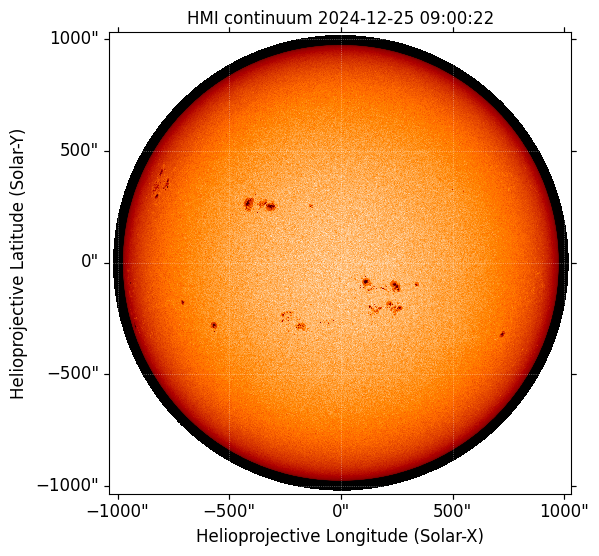

In [19]:
hmi_int_cmap = mpl.colormaps['hinodesotintensity'] # selecting colormap

hmi_int_map = hmi_int_map.rotate(order=3) # rotating the map
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection=hmi_int_map)
hmi_int_map.plot(axes=ax, autoalign=True, cmap = hmi_int_cmap)
plt.show()

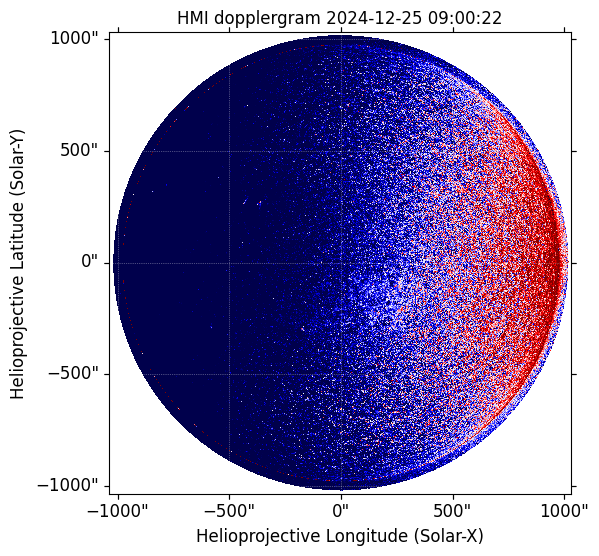

In [21]:
hmi_dop_cmap = mpl.colormaps['seismic'] # selecting colormap

hmi_dop_map = hmi_dop_map.rotate(order=3) # rotating the map
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection=hmi_int_map)
hmi_dop_map.plot(axes=ax, autoalign=True, cmap="seismic", vmin=-1000, vmax=1000)
plt.show()


## Task II-5

- Create a 1 x 3 plot showing the HMI magnetogram, doppler map and intensitygram (similar to example at begining of notebook), using the HMI data downloaded in the previous task.
- What do you see in all of these images and how do they relate to each other?

***

### Creating an annimation

First, let’s download a series of images in time using Fido. In this example, we will download a series of AIA 171 angstrom images observed over the course of half of a day at a cadence of 1 image every 1 hour.

In [7]:
result = Fido.search(a.Time('2018-05-30 00:00:00', '2018-05-30 12:00:00'),
                    a.Instrument.aia,
                    a.Wavelength(171*u.angstrom),
                    a.Sample(1*u.h))
print(result)

download_files = Fido.fetch(result, path='/Users/u1973287/OneDrive - University of Warwick/Outreach/ThaiPASS/data/II_data/{file}')
#download_files = file_search('aia_lev1_171a_2018*.fits', './data/II_data/') #- use this if downloaded data already and want to search files.
print(download_files)

Results from 1 Provider:

12 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport
Total estimated size: 813.466 Mbyte

       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size  
                                                                     Angstrom                                                                        Mibyte 
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- --------
2018-05-30 00:00:09.000 2018-05-30 00:00:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2018-05-30 01:00:09.000 2018-05-30 01:00:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.6484

Now that we have a set of images in time, instead of creating a single Map for each image we can create a __[Map Sequence](https://docs.sunpy.org/en/latest/generated/api/sunpy.map.MapSequence.html#sunpy.map.MapSequence)__ to hold all of them and then animate that sequence in time.

In [8]:
aia_sequence = sunpy.map.Map(download_files, sequence=True)

In [10]:
import imageio_ffmpeg
import matplotlib as mpl
from matplotlib.animation import FFMpegWriter
from sunpy.visualization.animator import MapSequenceAnimator

mpl.rcParams['animation.ffmpeg_path'] = imageio_ffmpeg.get_ffmpeg_exe()

import matplotlib.animation as anim
print("ffmpeg available? ", anim.writers.is_available("ffmpeg"))  # should print True

ffmpeg available?  True


2025-09-29 14:53:19 - matplotlib.animation - INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-09-29 14:53:19 - matplotlib.animation - INFO: MovieWriter._run: running command: /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 12 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -b 4000k -y data/II_data/aia_2018_171_anim_full.mp4


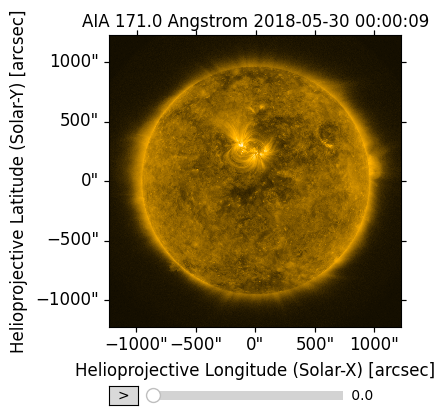

In [13]:
animator = MapSequenceAnimator(aia_sequence,interval=100)

mpl_anim = animator.get_animation()  # or your FuncAnimation
writer = FFMpegWriter(fps=12, bitrate=4000)
mpl_anim.save("data/II_data/aia_2018_171_anim_full.mp4", writer=writer, dpi=100)

Next, let’s crop one of the maps in our sequence to the active region of interest.

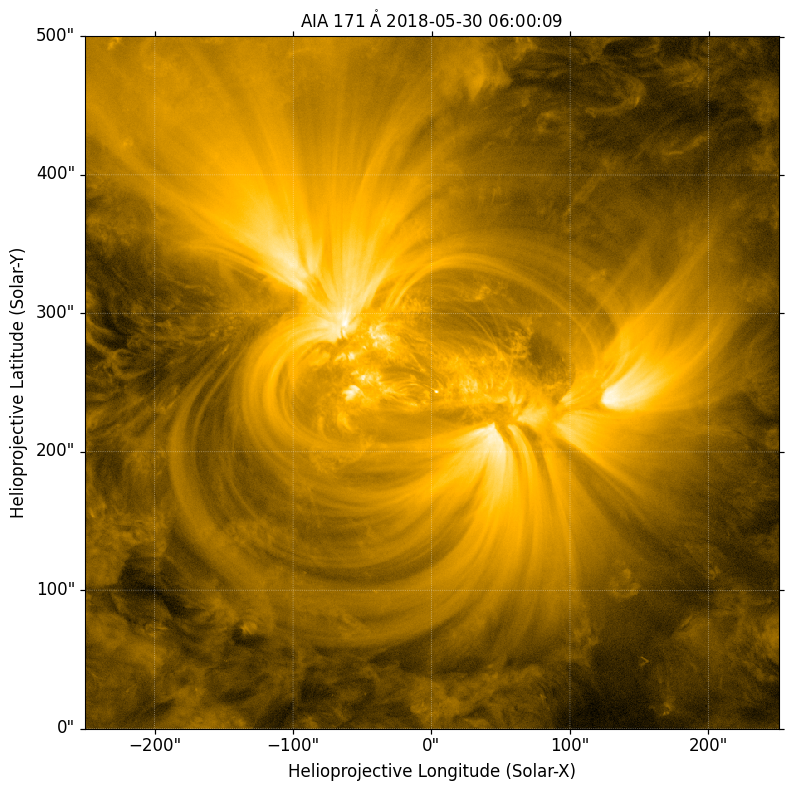

In [15]:
from astropy.coordinates import SkyCoord
bottom_corner = SkyCoord(Tx=-250*u.arcsec, Ty=0*u.arcsec, frame=aia_sequence[6].coordinate_frame)
cutout_map = aia_sequence[6].submap(bottom_corner, width=500*u.arcsec, height=500*u.arcsec)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(projection=cutout_map)
cutout_map.plot(axes=ax)

Now that we have our cutout from one Map around our active region, we can reproject that into each map in our sequence. To do this, we will use the propagate_with_solar_surface context manager to adjust the field of view of the cutout with the rotation of the solar surface.

In [16]:
from sunpy.coordinates import propagate_with_solar_surface

with propagate_with_solar_surface():
    aia_sequence_aligned = sunpy.map.Map([m.reproject_to(cutout_map.wcs) for m in aia_sequence], sequence=True)

2025-09-29 14:54:34 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:34 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:35 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:35 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:35 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:36 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:36 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:36 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:37 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:37 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:37 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2025-09-29 14:54:38 - reproject.

Finally, we can animate our sequence of reprojected cutouts to confirm that we’ve tracked our active region of interest as a function of time across the solar disk.

2025-09-29 14:55:31 - matplotlib.animation - INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-09-29 14:55:31 - matplotlib.animation - INFO: MovieWriter._run: running command: /Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/imageio_ffmpeg/binaries/ffmpeg-macos-aarch64-v7.1 -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 12 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -b 4000k -y data/II_data/aia_2018_171_anim_cutout.mp4


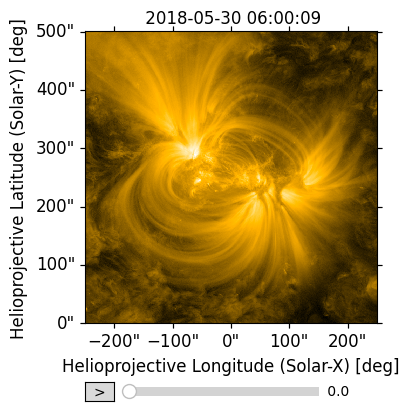

In [17]:
animator_cutout = MapSequenceAnimator(aia_sequence_aligned,interval=100)

mpl_anim = animator_cutout.get_animation()  # or your FuncAnimation
writer = FFMpegWriter(fps=12, bitrate=4000)
mpl_anim.save("data/II_data/aia_2018_171_anim_cutout.mp4", writer=writer, dpi=100)

## Task II-6
Have a think about what you can see in the animations. What structures are within the active region? What is happening in time? 

**Task:** Write a couple of sentences about what you observe. 

**Tip:** You may want to use __[Helioviewer](https://gs671-suske.ndc.nasa.gov/)__ to assist and also look up some terminology. 

## Task II-7
Using everything you have learned about accessing, plotting and manipulating SDO data from HMI and AIA:
1. Explore the layers of the solar surface and the corresponding magnetic field structure of the solar event which occurred on the 24/10/2014.
2. Create an animation of the solar event on the 24/10/2014.

**Tip:** You may want to use __[Helioviewer](https://gs671-suske.ndc.nasa.gov/)__ to pinpoint the times of the event before you download the data. 

<div class="alert alert-block alert-warning">
<b>CHECKPOINT 3:</b> Find a demonstrator and show them what you have created.
</div>